<a href="https://colab.research.google.com/github/Ilya-Stetskiy/mlGGF/blob/main/hw3_stetskiy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import ipywidgets as ipw

In [ ]:
df = pd.read_csv("attributes.csv")
df.head()

X         Y        Elev        V0  fact_ampl_pp_gr  fact_ampl_pp_mk  \
0  16150.04  17986.10  120.196317  1.384615       284.222090         1.263407   
1  16100.66  17978.20  107.691602  1.384615       121.116506         0.474654   
2  16051.08  17970.41  107.542895  1.384615       129.088820         0.439749   
3  16001.70  17962.51  107.394356  1.285714       138.807711         0.391217   
4  15952.72  17954.81  107.262991  1.285714       149.339632         0.327025   

   fact_ampl_pp_si  fact_ampl_pv_gr  fact_ampl_pv_mk  fact_ampl_pv_si  \
0       128.907331       273.690278         0.831353       204.348703   
1         5.883812       226.122562         0.888885       216.866621   
2        16.006177       251.086520         0.857030       218.860654   
3        25.677526       260.215629         0.755396       205.086313   
4        33.080279       250.405839         0.789063       203.922969   

   fact_freq_pp_gr  fact_freq_pp_mk  fact_freq_pp_si  fact_freq_pv_gr  \
0         8.548696         6.568408        11.996490        10.265258   
1         6.720315         1.564980        15.489440        11.086243   
2         6.991201         1.617356        15.545039        12.472042   
3         7.164131         1.653167        15.596579        13.653929   
4         7.172312         1.667173        15.658531        11.179142   

   fact_freq_pv_mk  fact_freq_pv_si  
0         6.544156        14.080112  
1         5.267542        14.642377  
2         4.513891        14.664633  
3         4.532095        14.609539  
4         4.813766        14.357159

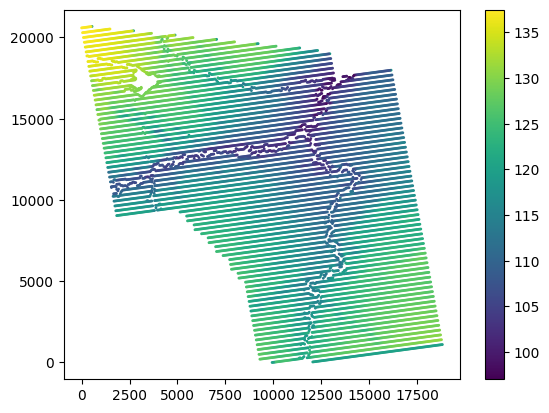

In [ ]:
plt.scatter(df["X"], df["Y"], c=df["Elev"], s=1)
plt.colorbar()

### Фильтрация

In [ ]:
df.describe()

X             Y          Elev            V0  \
count  17046.000000  17046.000000  17046.000000  17046.000000   
mean   10079.257772  11000.065603    118.577818      1.187334   
std     4645.803299   5395.438863      8.025273      0.184249   
min        0.000000      0.000000     97.034797      0.319672   
25%     6519.890000   6782.155000    111.857142      1.058824   
50%    10499.700000  11460.310000    119.497865      1.200000   
75%    13887.615000  15505.140000    124.732741      1.285714   
max    18824.370000  20675.620000    137.485739      2.000000   

       fact_ampl_pp_gr  fact_ampl_pp_mk  fact_ampl_pp_si  fact_ampl_pv_gr  \
count     17046.000000     17046.000000     17046.000000     17046.000000   
mean        297.553583         1.486119       134.277814       301.403800   
std         148.394561         1.931546        69.244866       128.800872   
min           0.159521         0.000131         0.002626         0.153293   
25%         198.041070         0.403249        87.899770       211.201723   
50%         275.646184         0.918984       127.502542       286.783214   
75%         372.212388         1.839117       170.213639       374.685796   
max        1064.210905        25.413900       510.457924       940.916155   

       fact_ampl_pv_mk  fact_ampl_pv_si  fact_freq_pp_gr  fact_freq_pp_mk  \
count     17046.000000     17046.000000     17046.000000     17046.000000   
mean          1.907962       165.562174         8.124070         6.433913   
std           1.734023        54.793411         3.008022         3.409650   
min           0.000202         4.626388         0.003252         0.000446   
25%           0.632853       127.766833         6.024848         4.141245   
50%           1.448790       162.162419         8.107320         5.958225   
75%           2.690147       202.422805        10.167639         8.181629   
max          13.668805       408.372080        19.776345        27.414433   

       fact_freq_pp_si  fact_freq_pv_gr  fact_freq_pv_mk  fact_freq_pv_si  
count     17046.000000     17046.000000     17046.000000     17046.000000  
mean         11.732677         8.914612         8.260683        15.114040  
std           2.720202         2.605531         3.261328         1.868319  
min           2.217792         0.571090         0.002566         7.915195  
25%           9.821538         7.111373         6.147358        13.824846  
50%          11.816395         8.812072         8.972977        15.107784  
75%          13.651900        10.659438        10.374452        16.328046  
max          22.434330        18.867420        26.536189        22.011933

In [ ]:
attribute_names = df.drop(columns=["X", "Y"]).columns.values
attribute_names

array(['Elev', 'V0', 'fact_ampl_pp_gr', 'fact_ampl_pp_mk',
       'fact_ampl_pp_si', 'fact_ampl_pv_gr', 'fact_ampl_pv_mk',
       'fact_ampl_pv_si', 'fact_freq_pp_gr', 'fact_freq_pp_mk',
       'fact_freq_pp_si', 'fact_freq_pv_gr', 'fact_freq_pv_mk',
       'fact_freq_pv_si'], dtype=object)

In [ ]:
len(attribute_names)

14

In [ ]:
def show_all(data,nrows=4,ncols=4,attribute_names=attribute_names ):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16), sharey=False) # sharey = True - у графиков общая ось y и диапазон
    for i in range(nrows):
        for j in range (ncols):
            if (i*ncols+j<len(attribute_names)):
                sns.boxplot(y = attribute_names[i*ncols+j], data = data, ax = axes[i,j], color = '#FE5e26') # ящик с усами


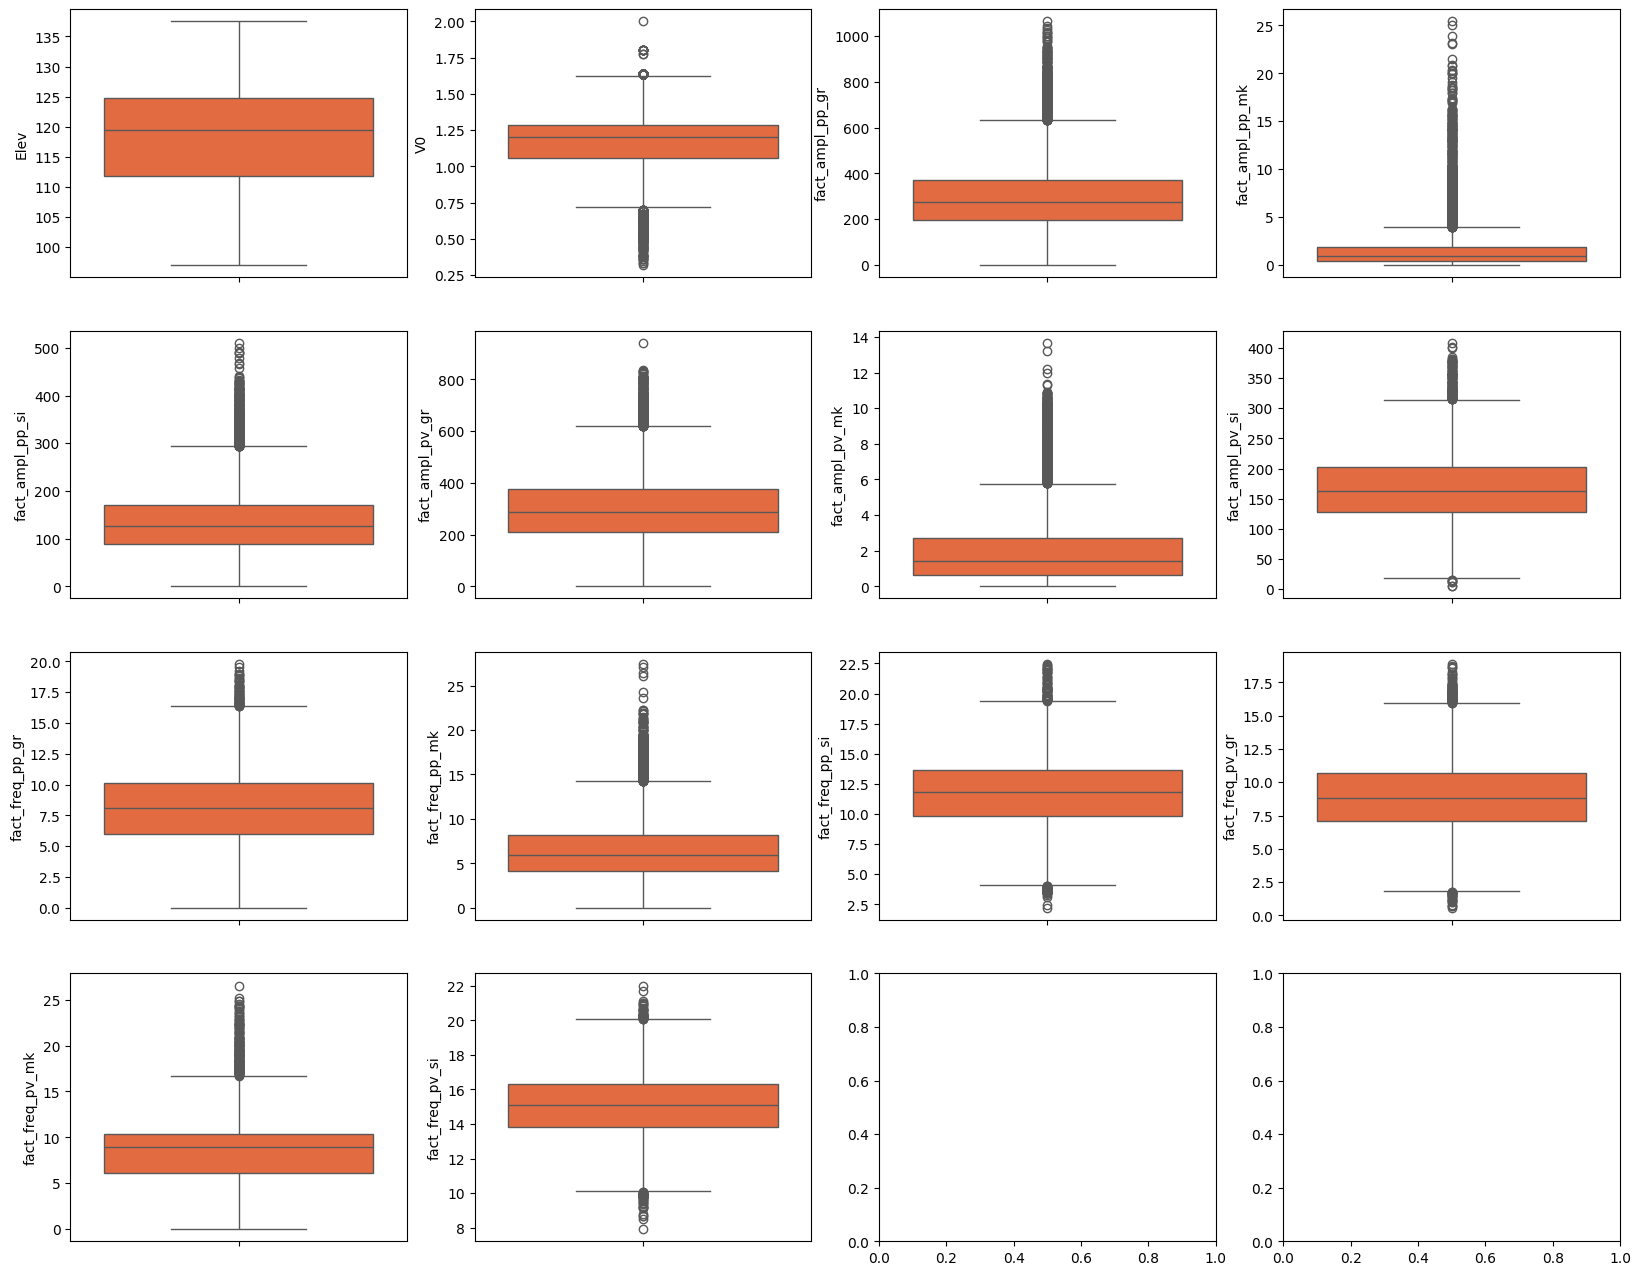

In [ ]:
show_all(df)

### фильтруем

In [ ]:
def filtered(df,attribute_names,n=3):
    for i in attribute_names:
        mean = df[i].mean()
        sigma = df[i].std()
        df = df[(df[i] <= mean+(n*sigma)) & (df[i] >= mean-(n*sigma))]
    return df

df_filtred = filtered(df, attribute_names, 3)


In [ ]:
df_filtred.describe()

X             Y          Elev            V0  \
count  15201.000000  15201.000000  15201.000000  15201.000000   
mean   10046.699464  11155.883929    118.598706      1.195050   
std     4568.031945   5368.090580      7.886988      0.172148   
min        0.000000      0.000000     97.204963      0.642857   
25%     6610.350000   7138.940000    111.932167      1.058824   
50%    10446.520000  11628.840000    119.474200      1.200000   
75%    13796.080000  15618.750000    124.473395      1.285714   
max    18824.370000  20675.620000    137.485739      1.636364   

       fact_ampl_pp_gr  fact_ampl_pp_mk  fact_ampl_pp_si  fact_ampl_pv_gr  \
count     15201.000000     15201.000000     15201.000000     15201.000000   
mean        284.043963         1.228903       128.164769       297.298811   
std         131.432108         1.197102        60.283290       119.943325   
min           0.159521         0.000131         0.002626         0.681348   
25%         193.784792         0.382034        86.510045       212.043528   
50%         269.859197         0.854998       124.247511       285.774198   
75%         358.653589         1.667899       163.312384       369.563770   
max         742.353315         7.035631       326.081770       684.840864   

       fact_ampl_pv_mk  fact_ampl_pv_si  fact_freq_pp_gr  fact_freq_pp_mk  \
count     15201.000000     15201.000000     15201.000000     15201.000000   
mean          1.769754       164.143010         8.165724         6.240980   
std           1.428060        52.977417         2.904866         3.044615   
min           0.000202         4.626388         0.003252         0.000446   
25%           0.623030       127.458266         6.116517         4.158232   
50%           1.422031       161.462910         8.162569         5.896299   
75%           2.604179       201.060246        10.171629         7.983506   
max           7.039437       327.546247        17.063824        16.264441   

       fact_freq_pp_si  fact_freq_pv_gr  fact_freq_pv_mk  fact_freq_pv_si  
count     15201.000000     15201.000000     15201.000000     15201.000000  
mean         11.758588         8.925346         8.180460        15.145174  
std           2.632653         2.552511         3.069636         1.848600  
min           3.749578         1.178359         0.002566         9.583894  
25%           9.903945         7.139171         6.132864        13.865285  
50%          11.862700         8.820619         8.933525        15.137940  
75%          13.642527        10.661499        10.327998        16.350165  
max          19.814792        16.696597        17.886271        20.672319

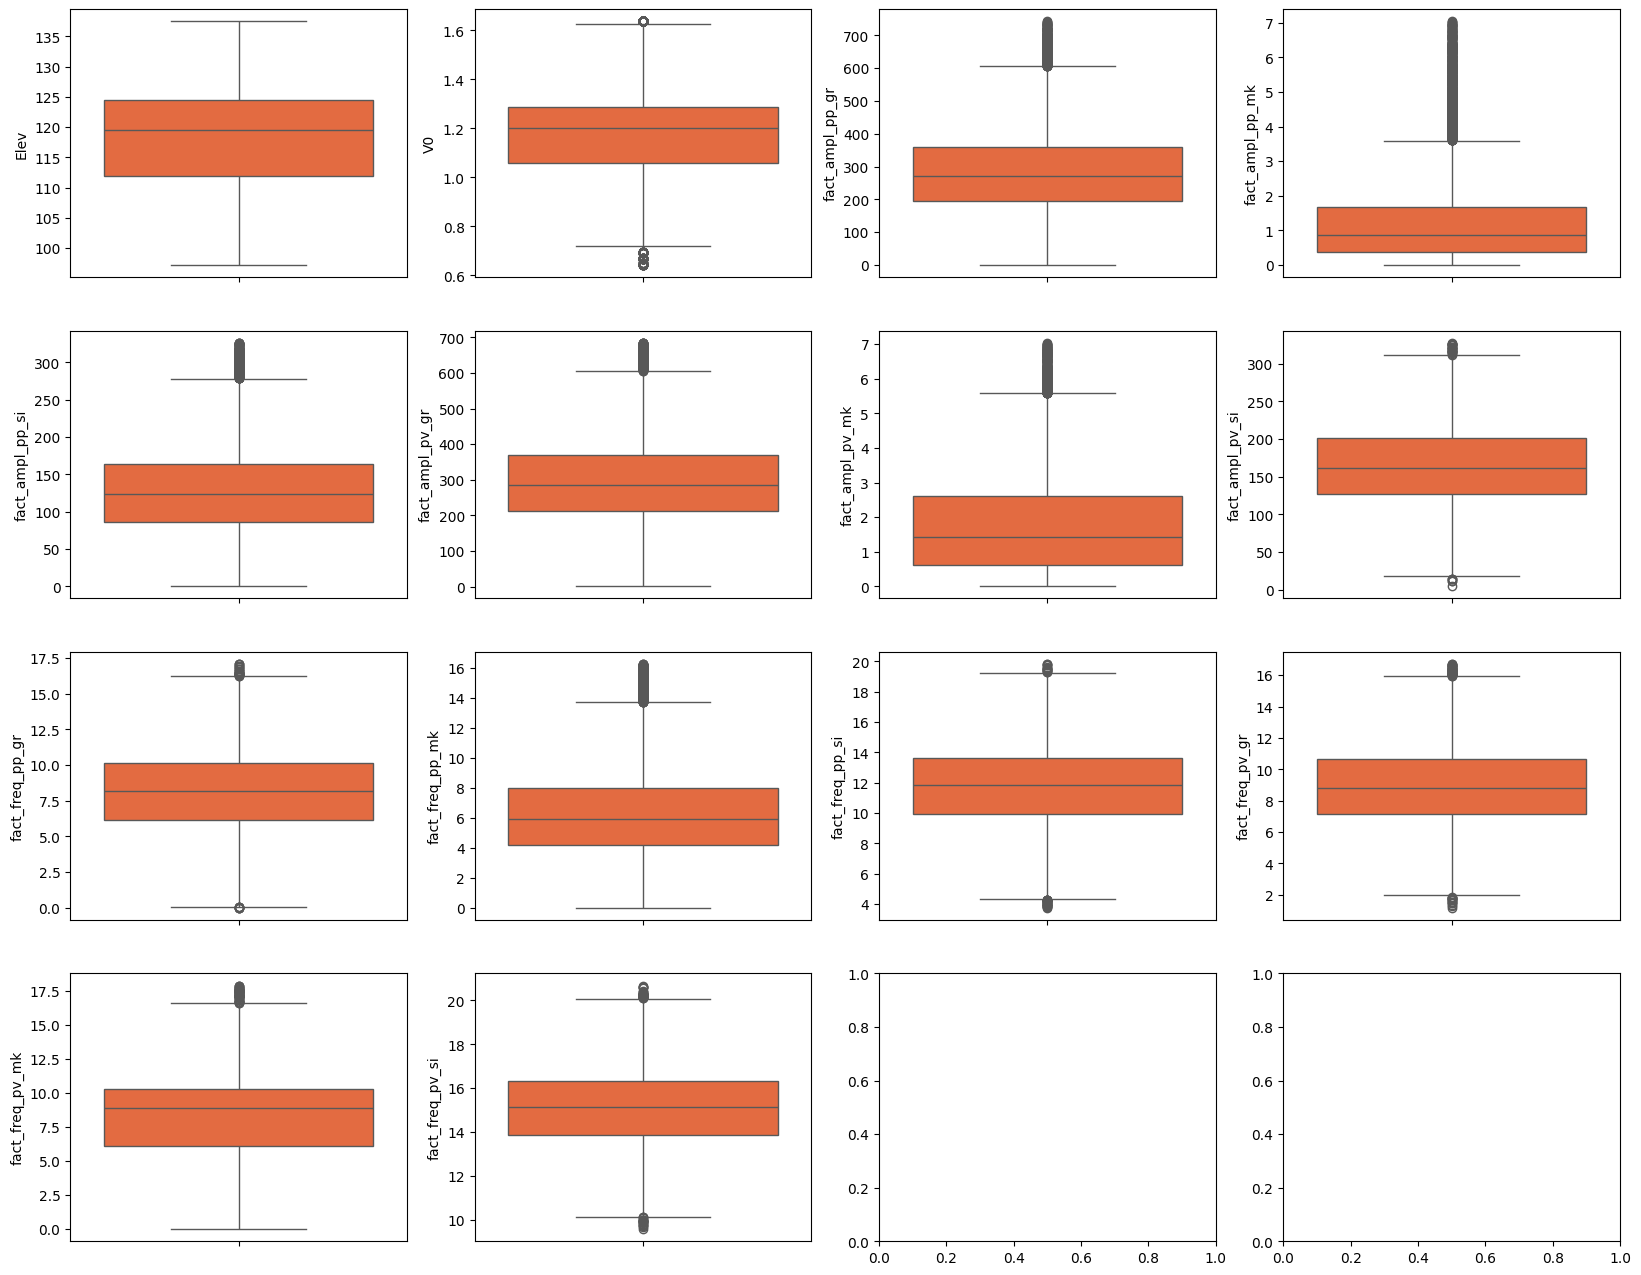

In [ ]:
show_all(df_filtred)

### Нормируем

In [ ]:
df_norm =df_filtred.iloc[:, 2:] / df_filtred.iloc[:, 2:].max()
df_norm

Elev        V0  fact_ampl_pp_gr  fact_ampl_pp_mk  fact_ampl_pp_si  \
0      0.874246  0.846154         0.382866         0.179573         0.395322   
1      0.783293  0.846154         0.163152         0.067464         0.018044   
2      0.782211  0.846154         0.173891         0.062503         0.049086   
3      0.781131  0.785714         0.186983         0.055605         0.078746   
4      0.780175  0.785714         0.201171         0.046481         0.101448   
...         ...       ...              ...              ...              ...   
17030  0.938469  0.785714         0.427594         0.021645         0.622071   
17033  0.938137  0.785714         0.432608         0.008089         0.621700   
17041  0.923144  0.425595         0.354757         0.041835         0.027686   
17044  0.919398  0.744792         0.276859         0.006045         0.064350   
17045  0.912211  0.410920         0.220941         0.103351         0.149986   

       fact_ampl_pv_gr  fact_ampl_pv_mk  fact_ampl_pv_si  fact_freq_pp_gr  \
0             0.399641         0.118099         0.623877         0.500984   
1             0.330183         0.126272         0.662095         0.393834   
2             0.366635         0.121747         0.668182         0.409709   
3             0.379965         0.107309         0.626129         0.419843   
4             0.365641         0.112092         0.622578         0.420323   
...                ...              ...              ...              ...   
17030         0.515782         0.440437         0.618719         0.433915   
17033         0.727509         0.503610         0.920997         0.400727   
17041         0.075306         0.203049         0.335668         0.091774   
17044         0.370176         0.038331         0.648408         0.314778   
17045         0.272634         0.244542         0.780758         0.284968   

       fact_freq_pp_mk  fact_freq_pp_si  fact_freq_pv_gr  fact_freq_pv_mk  \
0             0.403851         0.605431         0.614811         0.365876   
1             0.096221         0.781711         0.663982         0.294502   
2             0.099441         0.784517         0.746981         0.252366   
3             0.101643         0.787118         0.817767         0.253384   
4             0.102504         0.790245         0.669546         0.269132   
...                ...              ...              ...              ...   
17030         0.515366         0.548032         0.446369         0.544414   
17033         0.539425         0.545092         0.580401         0.457165   
17041         0.109187         0.457700         0.755535         0.563553   
17044         0.132517         0.307251         0.574285         0.494628   
17045         0.164279         0.340921         0.730783         0.517723   

       fact_freq_pv_si  
0             0.681109  
1             0.708308  
2             0.709385  
3             0.706720  
4             0.694511  
...                ...  
17030         0.704980  
17033         0.641791  
17041         0.730753  
17044         0.769435  
17045         0.704629  

[15201 rows x 14 columns]

In [ ]:
df_norm=pd.concat((df_filtred[["X", "Y"]],df_norm),axis=1)
df_norm

X         Y      Elev        V0  fact_ampl_pp_gr  \
0      16150.04  17986.10  0.874246  0.846154         0.382866   
1      16100.66  17978.20  0.783293  0.846154         0.163152   
2      16051.08  17970.41  0.782211  0.846154         0.173891   
3      16001.70  17962.51  0.781131  0.785714         0.186983   
4      15952.72  17954.81  0.780175  0.785714         0.201171   
...         ...       ...       ...       ...              ...   
17030  17550.08   2116.05  0.938469  0.785714         0.427594   
17033  17500.70   2108.15  0.938137  0.785714         0.432608   
17041  16940.62   5966.41  0.923144  0.425595         0.354757   
17044  18214.91   4953.52  0.919398  0.744792         0.276859   
17045  17836.76   7019.29  0.912211  0.410920         0.220941   

       fact_ampl_pp_mk  fact_ampl_pp_si  fact_ampl_pv_gr  fact_ampl_pv_mk  \
0             0.179573         0.395322         0.399641         0.118099   
1             0.067464         0.018044         0.330183         0.126272   
2             0.062503         0.049086         0.366635         0.121747   
3             0.055605         0.078746         0.379965         0.107309   
4             0.046481         0.101448         0.365641         0.112092   
...                ...              ...              ...              ...   
17030         0.021645         0.622071         0.515782         0.440437   
17033         0.008089         0.621700         0.727509         0.503610   
17041         0.041835         0.027686         0.075306         0.203049   
17044         0.006045         0.064350         0.370176         0.038331   
17045         0.103351         0.149986         0.272634         0.244542   

       fact_ampl_pv_si  fact_freq_pp_gr  fact_freq_pp_mk  fact_freq_pp_si  \
0             0.623877         0.500984         0.403851         0.605431   
1             0.662095         0.393834         0.096221         0.781711   
2             0.668182         0.409709         0.099441         0.784517   
3             0.626129         0.419843         0.101643         0.787118   
4             0.622578         0.420323         0.102504         0.790245   
...                ...              ...              ...              ...   
17030         0.618719         0.433915         0.515366         0.548032   
17033         0.920997         0.400727         0.539425         0.545092   
17041         0.335668         0.091774         0.109187         0.457700   
17044         0.648408         0.314778         0.132517         0.307251   
17045         0.780758         0.284968         0.164279         0.340921   

       fact_freq_pv_gr  fact_freq_pv_mk  fact_freq_pv_si  
0             0.614811         0.365876         0.681109  
1             0.663982         0.294502         0.708308  
2             0.746981         0.252366         0.709385  
3             0.817767         0.253384         0.706720  
4             0.669546         0.269132         0.694511  
...                ...              ...              ...  
17030         0.446369         0.544414         0.704980  
17033         0.580401         0.457165         0.641791  
17041         0.755535         0.563553         0.730753  
17044         0.574285         0.494628         0.769435  
17045         0.730783         0.517723         0.704629  

[15201 rows x 16 columns]

In [ ]:
df_norm.describe()

X             Y          Elev            V0  \
count  15201.000000  15201.000000  15201.000000  15201.000000   
mean   10046.699464  11155.883929      0.862626      0.730308   
std     4568.031945   5368.090580      0.057366      0.105202   
min        0.000000      0.000000      0.707019      0.392857   
25%     6610.350000   7138.940000      0.814137      0.647059   
50%    10446.520000  11628.840000      0.868993      0.733333   
75%    13796.080000  15618.750000      0.905355      0.785714   
max    18824.370000  20675.620000      1.000000      1.000000   

       fact_ampl_pp_gr  fact_ampl_pp_mk  fact_ampl_pp_si  fact_ampl_pv_gr  \
count     15201.000000     15201.000000     15201.000000     15201.000000   
mean          0.382626         0.174669         0.393045         0.434114   
std           0.177048         0.170149         0.184872         0.175140   
min           0.000215         0.000019         0.000008         0.000995   
25%           0.261041         0.054300         0.265302         0.309625   
50%           0.363519         0.121524         0.381032         0.417286   
75%           0.483131         0.237065         0.500833         0.539635   
max           1.000000         1.000000         1.000000         1.000000   

       fact_ampl_pv_mk  fact_ampl_pv_si  fact_freq_pp_gr  fact_freq_pp_mk  \
count     15201.000000     15201.000000     15201.000000     15201.000000   
mean          0.251406         0.501129         0.478540         0.383719   
std           0.202866         0.161740         0.170235         0.187195   
min           0.000029         0.014124         0.000191         0.000027   
25%           0.088506         0.389131         0.358449         0.255664   
50%           0.202009         0.492947         0.478355         0.362527   
75%           0.369941         0.613838         0.596093         0.490856   
max           1.000000         1.000000         1.000000         1.000000   

       fact_freq_pp_si  fact_freq_pv_gr  fact_freq_pv_mk  fact_freq_pv_si  
count     15201.000000     15201.000000     15201.000000     15201.000000  
mean          0.593425         0.534561         0.457360         0.732631  
std           0.132863         0.152876         0.171620         0.089424  
min           0.189231         0.070575         0.000143         0.463610  
25%           0.499826         0.427582         0.342881         0.670717  
50%           0.598679         0.528288         0.499463         0.732281  
75%           0.688502         0.638543         0.577426         0.790921  
max           1.000000         1.000000         1.000000         1.000000

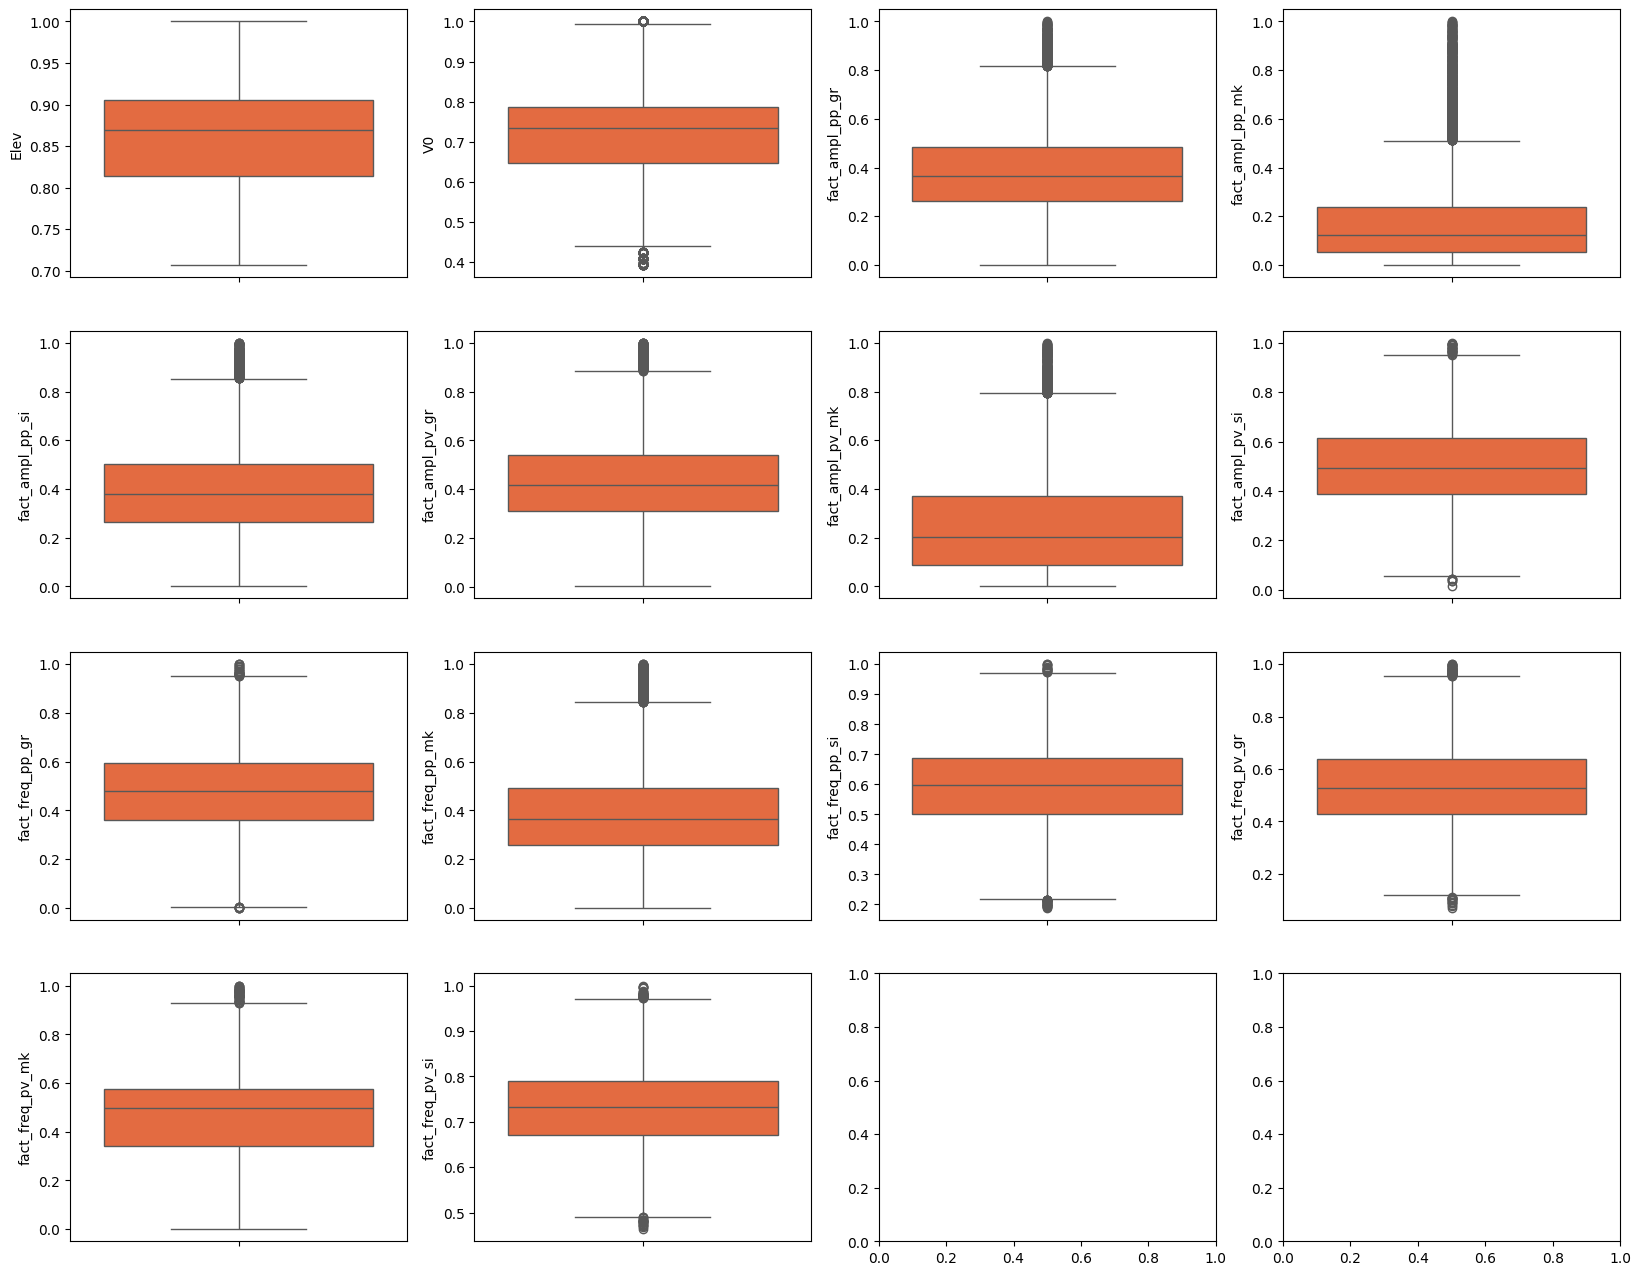

In [ ]:
show_all(df_norm)

# Матрица коэффициентов корреляции

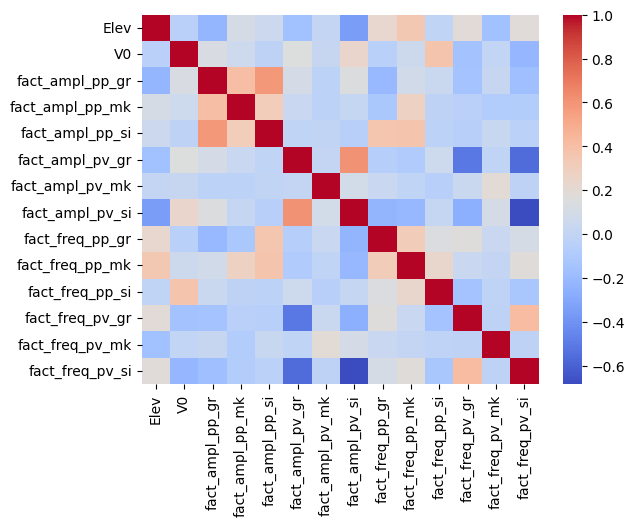

In [ ]:
sns.heatmap(df_norm.iloc[:,2:].corr(), cmap = 'coolwarm');

## Понижение размерности

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [ ]:
X_centered = (df_norm.iloc[:,2:] - df_norm.iloc[:,2:].mean())

### PCA


Text(0.5, 1.0, '2D')

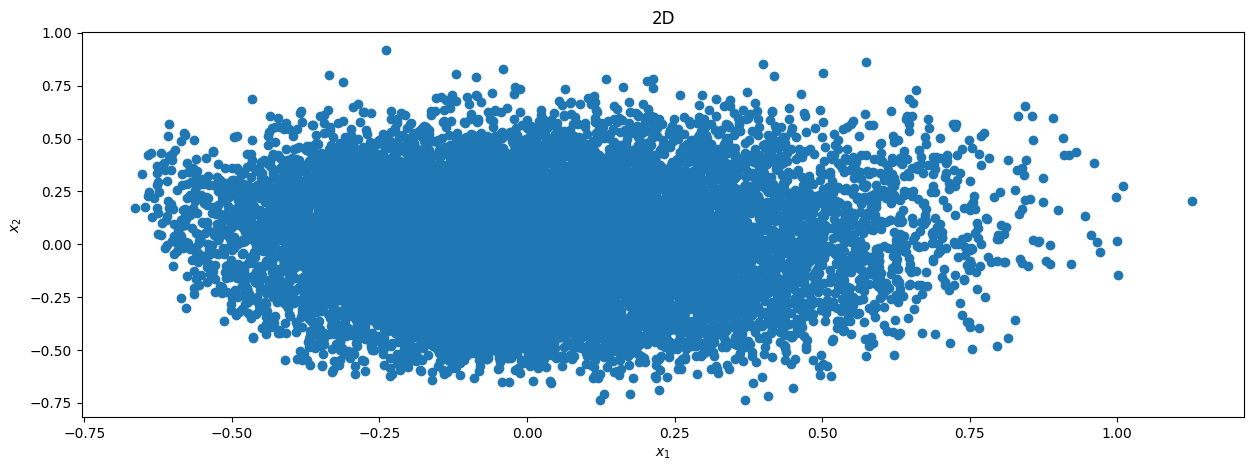

In [ ]:
fig = plt.figure(figsize=(15,5))
X_2 = PCA(n_components=2).fit_transform(X_centered)
plt.scatter(X_2[:,0], X_2[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('2D')


In [ ]:

X_3 = PCA(n_components=3).fit_transform(X_centered)
X_3

array([[ 0.01302132,  0.0239573 , -0.12932531],
       [-0.506175  , -0.09666444, -0.20142279],
       [-0.48112907, -0.10403568, -0.21188783],
       ...,
       [-0.44254814, -0.34496718, -0.14202377],
       [-0.48288759, -0.04463287, -0.20693001],
       [-0.4317403 , -0.09400254, -0.01105861]])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X_3[:, 0], y=X_3[:, 1], z=X_3[:, 2], mode='markers'))

### TSNE

Text(0.5, 1.0, '2D')

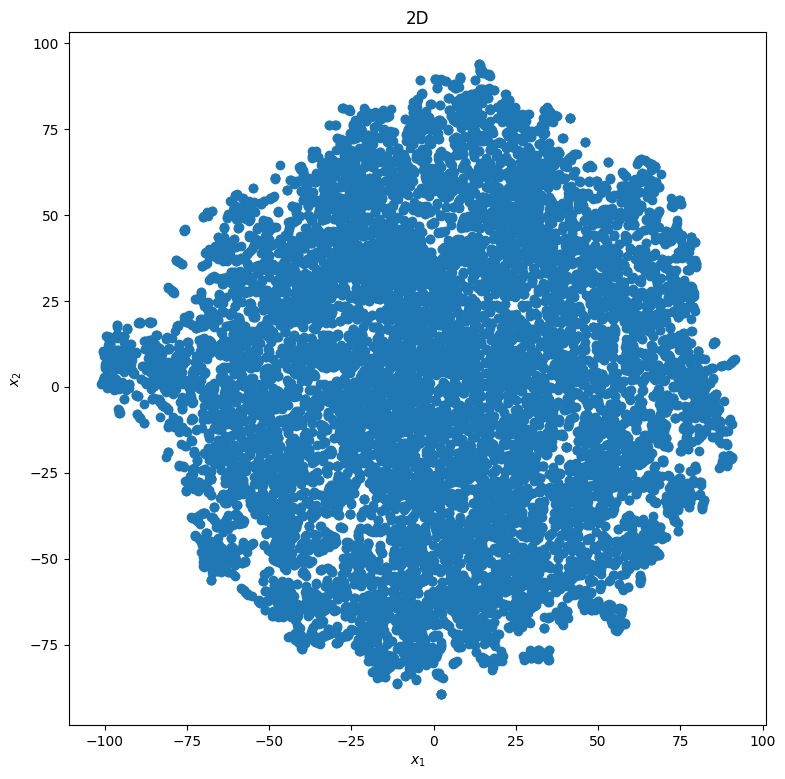

In [ ]:
fig = plt.figure(figsize=(9,9))
X_2 = TSNE(n_components=2).fit_transform(X_centered)
plt.scatter(X_2[:,0], X_2[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('2D')

In [ ]:
X_3 = TSNE(n_components=3).fit_transform(X_centered)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X_3[:, 0], y=X_3[:, 1], z=X_3[:, 2], mode='markers'))
fig.update_traces(marker_size = 1)

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=c924981f7bae848ccdf2df5b123b04c96792621117d401f22aa5ce14f35e2fab
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


### umap

In [ ]:
import umap

Text(0.5, 1.0, '2D')

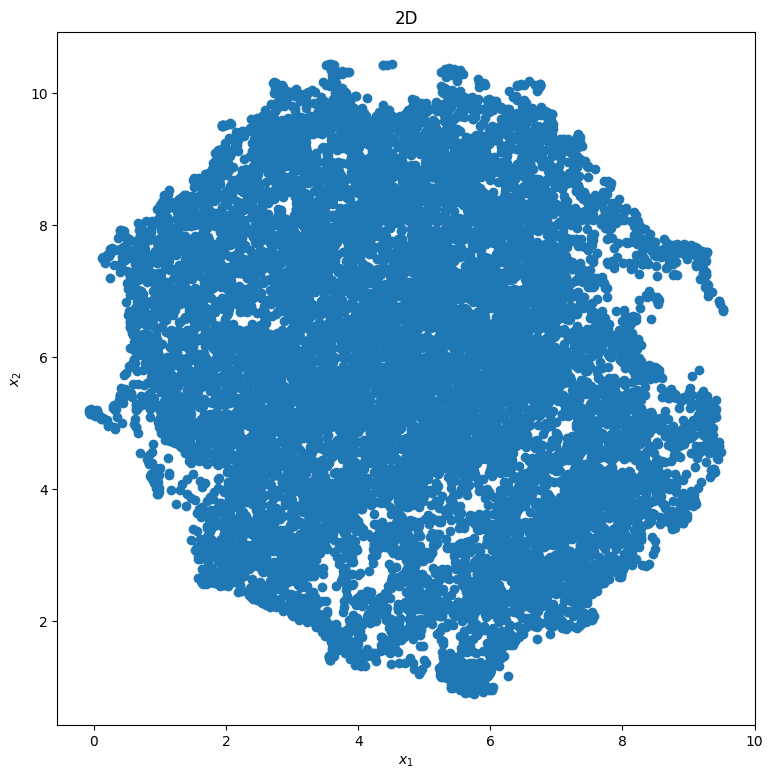

In [ ]:
fig = plt.figure(figsize=(9,9))
X_2 = umap.UMAP(n_components=2).fit_transform(X_centered)
plt.scatter(X_2[:,0], X_2[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('2D')

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
n_neighbors_array = np.arange(2, 30, 5)
min_dists = np.linspace(0, 1, len(n_neighbors_array))
umap_results = []
for n_neighbors in tqdm(n_neighbors_array):
  umap_results_ = []
  for min_dist in tqdm(min_dists):
    X_ = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist).fit_transform(X_centered)
    umap_results_.append(X_)
  umap_results.append(umap_results_)

In [ ]:
neighbors_slider = ipw.IntSlider(min=0, max=len(n_neighbors_array) - 1, step=1)
min_dists_slider = ipw.IntSlider(min=0, max=len(min_dists) - 1, step=1)

In [ ]:
def plot(ind_neighbor, ind_min_dist):
  fig = plt.figure(figsize=(9,4))

  X_2 = umap_results[ind_neighbor][ind_min_dist]
  plt.scatter(X_2[:,0], X_2[:,1],s=0.2)
  plt.title('UMAP result')

  fig.suptitle('UMAP: n_neighbors={}; min_dists={}'.format(n_neighbors_array[ind_neighbor], min_dists[ind_min_dist]))

  fig.tight_layout()
  plt.show()


In [ ]:
ipw.interact(plot, ind_neighbor=neighbors_slider, ind_min_dist=min_dists_slider)

interactive(children=(IntSlider(value=5, description='ind_neighbor', max=5), IntSlider(value=0, description='i…

<function __main__.plot(ind_neighbor, ind_min_dist)>

In [ ]:
X_3 = umap.UMAP(n_components=3).fit_transform(X_centered)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X_3[:, 0], y=X_3[:, 1], z=X_3[:, 2], mode='markers'))
fig.update_traces(marker_size = 1)

In [ ]:
n_neighbors_array = np.arange(2, 30, 5)
min_dists = np.linspace(0, 1, len(n_neighbors_array))
umap_results = []
for n_neighbors in tqdm(n_neighbors_array):
  umap_results_ = []
  for min_dist in tqdm(min_dists):
    X_ = umap.UMAP(n_components=3, n_neighbors=n_neighbors, min_dist=min_dist).fit_transform(X_centered)
    umap_results_.append(X_)
  umap_results.append(umap_results_)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small a

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
neighbors_slider = ipw.IntSlider(min=0, max=len(n_neighbors_array) - 1, step=1)
min_dists_slider = ipw.IntSlider(min=0, max=len(min_dists) - 1, step=1)

In [ ]:
def plot(ind_neighbor, ind_min_dist):
  fig = plt.figure(figsize=(9,4))

  X_2 = umap_results[ind_neighbor][ind_min_dist]
  fig = go.Figure()
  fig.add_trace(go.Scatter3d(x=X_3[:, 0], y=X_3[:, 1], z=X_3[:, 2], mode='markers'))
  fig.update_traces(marker_size = 1)
  fig.show()


In [ ]:
ipw.interact(plot, ind_neighbor=neighbors_slider, ind_min_dist=min_dists_slider)

interactive(children=(IntSlider(value=0, description='ind_neighbor', max=5), IntSlider(value=5, description='i…

<function __main__.plot(ind_neighbor, ind_min_dist)>

<Figure size 900x400 with 0 Axes>